In [87]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns

In [88]:
transfers = pd.read_csv('data/all_incoming_transfers.csv')

In [89]:
matches = pd.read_csv('data/all_league_matches.csv')

In [90]:
league_tables = pd.read_csv('data/league_tables.csv')
league_tables.season = league_tables.season.replace({'2017/18': '2017/2018'})
league_tables.season.unique()

array(['2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015',
       '2015/2016', '2016/2017', '2017/2018', '2018/2019'], dtype=object)

In [91]:
transfers.head()

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
0,2009,2009/2010,Man United,Antonio Valencia,23,Right Back,Wigan,£17.01m,22.453,English Premier League
1,2009,2009/2010,Man United,Mame Diouf,21,Striker,Molde FK,£4.05m,5.346,English Premier League
2,2009,2009/2010,Man United,Gabriel Obertan,20,Right Winger,Bordeaux,£3.60m,4.752,English Premier League
3,2009,2009/2010,Man United,Michael Owen,29,Striker,Newcastle,free_transfer,0.000,English Premier League
4,2009,2009/2010,Liverpool,Glen Johnson,24,Right Back,Portsmouth,£18.45m,24.354,English Premier League


In [92]:
matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2010-08-14,English Premier League,Aston Villa,West Ham,3,0,H,23.0,12.0,11.0,2.0,16.0,7.0,15.0,15.0,1.0,2.0,0.0,0.0
1,2010-08-14,English Premier League,Blackburn,Everton,1,0,H,7.0,17.0,2.0,12.0,1.0,3.0,19.0,14.0,2.0,1.0,0.0,0.0
2,2010-08-14,English Premier League,Bolton,Fulham,0,0,D,13.0,12.0,9.0,7.0,4.0,8.0,12.0,13.0,1.0,3.0,0.0,0.0
3,2010-08-14,English Premier League,Chelsea,West Brom,6,0,H,18.0,10.0,13.0,4.0,3.0,1.0,10.0,10.0,1.0,0.0,0.0,0.0
4,2010-08-14,English Premier League,Sunderland,Birmingham,2,2,D,6.0,13.0,2.0,7.0,3.0,6.0,13.0,10.0,3.0,3.0,1.0,0.0


In [93]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10848 entries, 0 to 10847
Data columns (total 10 columns):
year                   10848 non-null int64
season                 10848 non-null object
buying_club            10848 non-null object
player_name            10848 non-null object
age                    10848 non-null int64
position               10848 non-null object
selling_club           10848 non-null object
fee                    10846 non-null object
fee_in_millions_usd    10848 non-null float64
league_name            10848 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 847.6+ KB


In [94]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16434 entries, 0 to 16433
Data columns (total 19 columns):
date                    16434 non-null object
league_name             16434 non-null object
home_team               16434 non-null object
away_team               16434 non-null object
home_goals              16434 non-null int64
away_goals              16434 non-null int64
result                  16434 non-null object
home_shots              16432 non-null float64
away_shots              16432 non-null float64
home_shots_on_target    16432 non-null float64
away_shots_on_target    16432 non-null float64
home_corners            16432 non-null float64
away_corners            16432 non-null float64
home_fouls              16430 non-null float64
away_fouls              16430 non-null float64
home_yellow_cards       16431 non-null float64
away_yellow_cards       16432 non-null float64
home_red_cards          16432 non-null float64
away_red_cards          16432 non-null float64
dtypes:

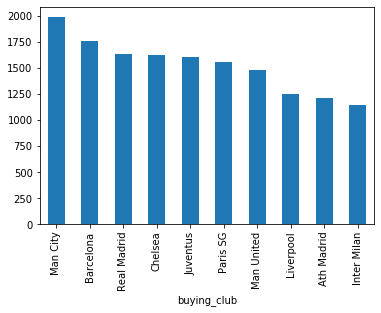

In [95]:
transfers.groupby('buying_club').fee_in_millions_usd.sum().nlargest(10).plot(kind = 'bar')

In [96]:
transfers.selling_club = transfers.selling_club.replace({'Bor. Dortmund': 'Dortmund'})

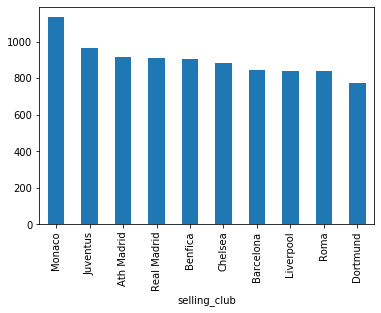

In [97]:
transfers.groupby('selling_club').fee_in_millions_usd.sum().nlargest(10).plot(kind = 'bar')

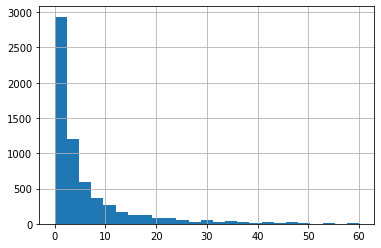

In [98]:
transfers[(transfers.fee_in_millions_usd > 0) & (transfers.fee_in_millions_usd < 60)].fee_in_millions_usd.hist(bins = 25)

In [99]:
leicester_transfers = transfers[transfers.buying_club == 'Leicester']
leicester_transfers.head()

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
965,2014,2014/2015,Leicester,Leonardo Ulloa,27,Striker,Brighton,£9.09m,11.999,English Premier League
966,2014,2014/2015,Leicester,Andrej Kramaric,23,Striker,HNK Rijeka,£8.10m,10.692,English Premier League
967,2014,2014/2015,Leicester,Danny Simpson,27,Right Back,QPR,£2.25m,2.970,English Premier League
968,2014,2014/2015,Leicester,Tom Lawrence,20,Left Winger,Man Utd U23,£1.13m,1.492,English Premier League
969,2014,2014/2015,Leicester,Ben Hamer,26,Goalkeeper,Charlton,free_transfer,0.000,English Premier League


In [100]:
leicester_transfers[leicester_transfers.year == 2015]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1195,2015,2015/2016,Leicester,Shinji Okazaki,29,Striker,Mainz,£9.90m,13.068,English Premier League
1196,2015,2015/2016,Leicester,N'Golo Kante,24,Center Midfielder,Caen,£8.10m,10.692,English Premier League
1197,2015,2015/2016,Leicester,Gokhan Inler,31,Defensive Midfielder,Napoli,£6.30m,8.316,English Premier League
1198,2015,2015/2016,Leicester,Yohan Benalouane,28,Center Back,Atalanta,£6.30m,8.316,English Premier League
1199,2015,2015/2016,Leicester,Daniel Amartey,21,Defensive Midfielder,FC Copenhagen,£5.94m,7.841,English Premier League
1200,2015,2015/2016,Leicester,Demarai Gray,19,Left Winger,Birmingham,£4.59m,6.059,English Premier League
1201,2015,2015/2016,Leicester,Robert Huth,30,Center Back,Stoke,£3.78m,4.990,English Premier League
1202,2015,2015/2016,Leicester,Christian Fuchs,29,Left Back,Schalke 04,free_transfer,0.000,English Premier League
1203,2015,2015/2016,Leicester,Nathan Dyer,27,Right Winger,Swansea,loan,0.000,English Premier League


In [101]:
leicester_transfers[leicester_transfers.year == 2016]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1288,2016,2016/2017,Leicester,Islam Slimani,28,Striker,Sporting CP,£27.45m,36.234,English Premier League
1289,2016,2016/2017,Leicester,Ahmed Musa,23,Striker,CSKA Moscow,£17.55m,23.166,English Premier League
1290,2016,2016/2017,Leicester,Wilfred Ndidi,20,Defensive Midfielder,KRC Genk,£15.84m,20.909,English Premier League
1291,2016,2016/2017,Leicester,Nampalys Mendy,24,Defensive Midfielder,Nice,£13.95m,18.414,English Premier League
1292,2016,2016/2017,Leicester,Bartosz Kapustka,19,Attacking Midfielder,Cracovia Krakow,£4.50m,5.940,English Premier League
1293,2016,2016/2017,Leicester,Ron-Robert Zieler,27,Goalkeeper,Hannover,£3.15m,4.158,English Premier League
1294,2016,2016/2017,Leicester,Luis Hernandez,27,Center Back,Sp Gijon,free_transfer,0.000,English Premier League
1295,2016,2016/2017,Leicester,Molla Wague,25,Center Back,Granada,loan,0.000,English Premier League


In [102]:
matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2010-08-14,English Premier League,Aston Villa,West Ham,3,0,H,23.0,12.0,11.0,2.0,16.0,7.0,15.0,15.0,1.0,2.0,0.0,0.0
1,2010-08-14,English Premier League,Blackburn,Everton,1,0,H,7.0,17.0,2.0,12.0,1.0,3.0,19.0,14.0,2.0,1.0,0.0,0.0
2,2010-08-14,English Premier League,Bolton,Fulham,0,0,D,13.0,12.0,9.0,7.0,4.0,8.0,12.0,13.0,1.0,3.0,0.0,0.0
3,2010-08-14,English Premier League,Chelsea,West Brom,6,0,H,18.0,10.0,13.0,4.0,3.0,1.0,10.0,10.0,1.0,0.0,0.0,0.0
4,2010-08-14,English Premier League,Sunderland,Birmingham,2,2,D,6.0,13.0,2.0,7.0,3.0,6.0,13.0,10.0,3.0,3.0,1.0,0.0


In [103]:
matches[matches.home_team == 'Leicester'].away_goals.sum()

107

In [104]:
matches.groupby(['home_team', 'away_team'])['away_goals', 'home_goals'].sum().head()

away_goals  home_goals
home_team  away_team                        
AC Ajaccio Auxerre             1           2
           Bastia              1           1
           Bordeaux            3           2
           Brest               0           1
           Caen                2           2

In [105]:
leicester_matches = matches[(matches['away_team'].str.contains('Leicester')) | (matches['home_team'].str.contains('Leicester'))]
leicester_matches

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
1521,2014-08-16,English Premier League,Leicester,Everton,2,2,D,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0
1531,2014-08-23,English Premier League,Chelsea,Leicester,2,0,H,27.0,6.0,10.0,4.0,8.0,7.0,11.0,11.0,0.0,1.0,0.0,0.0
1548,2014-08-31,English Premier League,Leicester,Arsenal,1,1,D,9.0,24.0,3.0,6.0,5.0,10.0,14.0,6.0,3.0,1.0,0.0,0.0
1555,2014-09-13,English Premier League,Stoke,Leicester,0,1,A,24.0,8.0,4.0,1.0,13.0,3.0,8.0,15.0,3.0,0.0,0.0,0.0
1567,2014-09-21,English Premier League,Leicester,Man United,5,3,H,15.0,16.0,5.0,5.0,2.0,4.0,11.0,9.0,1.0,1.0,0.0,1.0
1572,2014-09-27,English Premier League,Crystal Palace,Leicester,2,0,H,16.0,7.0,6.0,1.0,6.0,6.0,14.0,9.0,0.0,2.0,0.0,0.0
1582,2014-10-04,English Premier League,Leicester,Burnley,2,2,D,15.0,10.0,6.0,4.0,9.0,3.0,16.0,12.0,2.0,2.0,0.0,0.0
1595,2014-10-18,English Premier League,Newcastle,Leicester,1,0,H,19.0,7.0,6.0,2.0,10.0,7.0,13.0,15.0,0.0,3.0,0.0,0.0
1603,2014-10-25,English Premier League,Swansea,Leicester,2,0,H,7.0,9.0,3.0,4.0,2.0,2.0,7.0,10.0,0.0,0.0,0.0,0.0
1614,2014-11-01,English Premier League,Leicester,West Brom,0,1,A,14.0,8.0,5.0,3.0,8.0,3.0,5.0,12.0,0.0,1.0,0.0,0.0


In [106]:
leicester_matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
1521,2014-08-16,English Premier League,Leicester,Everton,2,2,D,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0
1531,2014-08-23,English Premier League,Chelsea,Leicester,2,0,H,27.0,6.0,10.0,4.0,8.0,7.0,11.0,11.0,0.0,1.0,0.0,0.0
1548,2014-08-31,English Premier League,Leicester,Arsenal,1,1,D,9.0,24.0,3.0,6.0,5.0,10.0,14.0,6.0,3.0,1.0,0.0,0.0
1555,2014-09-13,English Premier League,Stoke,Leicester,0,1,A,24.0,8.0,4.0,1.0,13.0,3.0,8.0,15.0,3.0,0.0,0.0,0.0
1567,2014-09-21,English Premier League,Leicester,Man United,5,3,H,15.0,16.0,5.0,5.0,2.0,4.0,11.0,9.0,1.0,1.0,0.0,1.0


In [107]:
leicester_matches['total_goals'] = leicester_matches['home_goals'] + leicester_matches['away_goals']

C:\Users\1saml\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
leicester_matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,total_goals
1521,2014-08-16,English Premier League,Leicester,Everton,2,2,D,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0,4
1531,2014-08-23,English Premier League,Chelsea,Leicester,2,0,H,27.0,6.0,10.0,4.0,8.0,7.0,11.0,11.0,0.0,1.0,0.0,0.0,2
1548,2014-08-31,English Premier League,Leicester,Arsenal,1,1,D,9.0,24.0,3.0,6.0,5.0,10.0,14.0,6.0,3.0,1.0,0.0,0.0,2
1555,2014-09-13,English Premier League,Stoke,Leicester,0,1,A,24.0,8.0,4.0,1.0,13.0,3.0,8.0,15.0,3.0,0.0,0.0,0.0,1
1567,2014-09-21,English Premier League,Leicester,Man United,5,3,H,15.0,16.0,5.0,5.0,2.0,4.0,11.0,9.0,1.0,1.0,0.0,1.0,8


In [109]:
leicester_matches[(leicester_matches.home_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].away_goals.sum()

18

In [110]:
leicester_matches[(leicester_matches.away_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].home_goals.sum()

18

In [111]:
leicester_matches[(leicester_matches['away_team'].str.contains('Leicester')) | (leicester_matches['home_team'].str.contains('Leicester'))]

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,total_goals
1521,2014-08-16,English Premier League,Leicester,Everton,2,2,D,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0,4
1531,2014-08-23,English Premier League,Chelsea,Leicester,2,0,H,27.0,6.0,10.0,4.0,8.0,7.0,11.0,11.0,0.0,1.0,0.0,0.0,2
1548,2014-08-31,English Premier League,Leicester,Arsenal,1,1,D,9.0,24.0,3.0,6.0,5.0,10.0,14.0,6.0,3.0,1.0,0.0,0.0,2
1555,2014-09-13,English Premier League,Stoke,Leicester,0,1,A,24.0,8.0,4.0,1.0,13.0,3.0,8.0,15.0,3.0,0.0,0.0,0.0,1
1567,2014-09-21,English Premier League,Leicester,Man United,5,3,H,15.0,16.0,5.0,5.0,2.0,4.0,11.0,9.0,1.0,1.0,0.0,1.0,8
1572,2014-09-27,English Premier League,Crystal Palace,Leicester,2,0,H,16.0,7.0,6.0,1.0,6.0,6.0,14.0,9.0,0.0,2.0,0.0,0.0,2
1582,2014-10-04,English Premier League,Leicester,Burnley,2,2,D,15.0,10.0,6.0,4.0,9.0,3.0,16.0,12.0,2.0,2.0,0.0,0.0,4
1595,2014-10-18,English Premier League,Newcastle,Leicester,1,0,H,19.0,7.0,6.0,2.0,10.0,7.0,13.0,15.0,0.0,3.0,0.0,0.0,1
1603,2014-10-25,English Premier League,Swansea,Leicester,2,0,H,7.0,9.0,3.0,4.0,2.0,2.0,7.0,10.0,0.0,0.0,0.0,0.0,2
1614,2014-11-01,English Premier League,Leicester,West Brom,0,1,A,14.0,8.0,5.0,3.0,8.0,3.0,5.0,12.0,0.0,1.0,0.0,0.0,1


In [112]:
leicester_matches[(leicester_matches.home_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].home_goals.sum() \
+ leicester_matches[(leicester_matches.away_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].away_goals.sum()

68

In [113]:
leicester_matches[(leicester_matches.away_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].away_goals.sum()

33

In [114]:
leicester_matches.loc[leicester_matches['away_team'] == "Leicester", 'away_goals'].sum() \
+ leicester_matches.loc[leicester_matches['home_team'] == "Leicester", 'home_goals'].sum()

269

In [115]:
def goals_scored(team_name, min_date, max_date):
    matches[(matches.home_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].home_goals.sum() \
+ matches[(matches.away_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].away_goals.sum()
    return (matches[(matches.home_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].home_goals.sum() \
+ matches[(matches.away_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].away_goals.sum())

In [116]:
goals_scored('Leicester', '2015-08-08', '2016-05-15')

68

In [117]:
def goals_conceded(team_name, min_date, max_date):
    matches[(matches.home_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].away_goals.sum() \
+ matches[(matches.away_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].home_goals.sum()
    return (matches[(matches.home_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].away_goals.sum() \
+ matches[(matches.away_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].home_goals.sum())

In [118]:
goals_conceded('Leicester', '2015-08-08', '2016-05-15')

36

In [119]:
goals_scored('Leicester', '2016-07-01', '2017-07-01')

48

In [120]:
goals_conceded('Leicester', '2016-07-01', '2017-07-01')

63

In [121]:
goals_scored('Barcelona', '2016-07-01', '2017-07-01')

116

In [122]:
goals_conceded('Barcelona', '2016-08-01', '2017-06-01')

37

In [123]:
pd.set_option("display.max_rows", 999)

In [124]:
transfers[transfers.buying_club == "AC Milan"]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
5370,2009,2009/2010,AC Milan,Klaas-Jan Huntelaar,25,Striker,Real Madrid,£13.50m,17.820,Italian Serie A
5371,2009,2009/2010,AC Milan,Ignazio Abate,22,Right Back,Torino,£2.52m,3.326,Italian Serie A
5372,2009,2009/2010,AC Milan,Davide Di Gennaro,21,Defensive Midfielder,Genoa,£2.25m,2.970,Italian Serie A
5373,2009,2009/2010,AC Milan,Dominic Adiyiah,20,Right Winger,Fredrikstad,£1.26m,1.663,Italian Serie A
5374,2009,2009/2010,AC Milan,Elia Legati,24,Center Back,Crotone,£360k,0.475,Italian Serie A
5375,2009,2009/2010,AC Milan,Oguchi Onyewu,27,Center Back,Standard Liege,free_transfer,0.000,Italian Serie A
5376,2009,2009/2010,AC Milan,Flavio Roma,35,Goalkeeper,Monaco,free_transfer,0.000,Italian Serie A
5377,2009,2009/2010,AC Milan,Mancini,29,Left Winger,Inter,loan,0.000,Italian Serie A
5378,2009,2009/2010,AC Milan,David Beckham,34,Right Midfielder,LA Galaxy,loan,0.000,Italian Serie A
5599,2010,2010/2011,AC Milan,Robinho,26,Striker,Man City,£16.20m,21.384,Italian Serie A


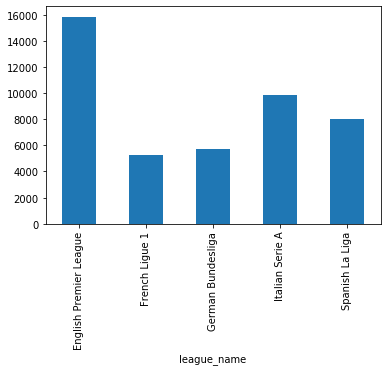

In [125]:
transfers.groupby(['league_name']).fee_in_millions_usd.sum().plot(kind = 'bar')

In [126]:
transfers.buying_club.unique()

array(['Man United', 'Liverpool', 'Chelsea', 'Arsenal', 'Everton',
       'Aston Villa', 'Fulham', 'Tottenham', 'West Ham', 'Man City',
       'Wigan', 'Stoke', 'Bolton', 'Portsmouth', 'Blackburn',
       'Sunderland', 'Hull', 'Wolves', 'Birmingham', 'Burnley',
       'Newcastle', 'West Brom', 'Blackpool', 'QPR', 'Norwich', 'Swansea',
       'Southampton', 'Reading', 'Cardiff', 'Crystal Palace', 'Leicester',
       'Bournemouth', 'Watford', 'Middlesbrough', 'Brighton',
       'Huddersfield', 'Sheffield United', 'Bordeaux', 'Monaco',
       'Marseille', 'Rennes', 'Auxerre', 'Toulouse', 'Nice', 'Paris SG',
       'St Etienne', 'Sochaux', 'Lens', 'Montpellier', 'Lyon', 'Lille',
       'Lorient', 'Nancy', 'Le Mans', 'Grenoble', 'Valenciennes',
       'Boulogne', 'Caen', 'Brest', 'Arles', 'AC Ajaccio', 'Dijon',
       'Evian', 'Bastia', 'Troyes', 'Reims', 'Guingamp', 'Nantes', 'Metz',
       'Angers', 'Ajaccio GFCO', 'Amiens', 'Strasbourg', 'Nimes',
       'Hertha Berlin', 'Bochum', 'Wolfsb

In [127]:
league_tables.head()

,season,league_name,finish,team_name,points
0,2010/2011,English Premier League,1,Man United,80
1,2010/2011,English Premier League,2,Chelsea,71
2,2010/2011,English Premier League,3,Man City,71
3,2010/2011,English Premier League,4,Arsenal,68
4,2010/2011,English Premier League,5,Tottenham,62


In [128]:
top_4_finishes = league_tables[league_tables.finish.isin([1,2,3,4])]

In [129]:
top_4_finishes.head()

,season,league_name,finish,team_name,points
0,2010/2011,English Premier League,1,Man United,80
1,2010/2011,English Premier League,2,Chelsea,71
2,2010/2011,English Premier League,3,Man City,71
3,2010/2011,English Premier League,4,Arsenal,68
20,2010/2011,French Ligue 1,1,Lille,76


In [130]:
top_4_finishes.tail()

,season,league_name,finish,team_name,points
845,2018/2019,Italian Serie A,4,Inter Milan,69
862,2018/2019,Spanish La Liga,1,Barcelona,87
863,2018/2019,Spanish La Liga,2,Ath Madrid,76
864,2018/2019,Spanish La Liga,3,Real Madrid,68
865,2018/2019,Spanish La Liga,4,Valencia,61


In [131]:
top_4_finishes.team_name.value_counts()

Bayern Munich        9
Real Madrid          9
Barcelona            9
Man City             9
Paris SG             9
Juventus             8
Lyon                 8
Dortmund             8
Napoli               7
Ath Madrid           7
Chelsea              6
Arsenal              6
Leverkusen           6
Valencia             5
Monaco               5
Roma                 5
Tottenham            5
Man United           5
Marseille            4
Schalke 04           4
Inter Milan          4
Liverpool            4
Lille                4
Fiorentina           3
AC Milan             3
Nice                 3
B Monchengladbach    3
Atalanta             2
RB Leipzig           2
Villarreal           2
Lazio                2
Udinese              2
Hoffenheim           2
St Etienne           2
Hannover             1
Montpellier          1
Leicester            1
Wolfsburg            1
Sevilla              1
Malaga               1
Ath Bilbao           1
Sociedad             1
Name: team_name, dtype: int64

In [132]:
league_winners = top_4_finishes[top_4_finishes.finish == 1]
league_winners

,season,league_name,finish,team_name,points
0,2010/2011,English Premier League,1,Man United,80
20,2010/2011,French Ligue 1,1,Lille,76
40,2010/2011,German Bundesliga,1,Dortmund,75
58,2010/2011,Italian Serie A,1,AC Milan,82
78,2010/2011,Spanish La Liga,1,Barcelona,96
98,2011/2012,English Premier League,1,Man City,89
118,2011/2012,French Ligue 1,1,Montpellier,82
138,2011/2012,German Bundesliga,1,Dortmund,81
156,2011/2012,Italian Serie A,1,Juventus,84
176,2011/2012,Spanish La Liga,1,Real Madrid,100


In [133]:
league_winners.team_name.value_counts()

Juventus         8
Bayern Munich    7
Paris SG         6
Barcelona        6
Man City         4
Real Madrid      2
Chelsea          2
Man United       2
Dortmund         2
Ath Madrid       1
Montpellier      1
AC Milan         1
Monaco           1
Lille            1
Leicester        1
Name: team_name, dtype: int64

In [134]:
transfers[(transfers.buying_club == 'Montpellier') & (transfers.season == '2011/2012')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
2238,2011,2011/2012,Montpellier,Henri Bedimo,27,Left Back,Lens,£1.80m,2.376,French Ligue 1
2239,2011,2011/2012,Montpellier,Jonathan Tinhan,22,Striker,Grenoble,free_transfer,0.000,French Ligue 1
2240,2011,2011/2012,Montpellier,Hilton,33,Center Back,Marseille,free_transfer,0.000,French Ligue 1


In [135]:
transfers[(transfers.buying_club == 'Monaco') & (transfers.season == '2016/2017')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
2981,2016,2016/2017,Monaco,Djibril Sidibe,23,Right Back,Lille,£13.50m,17.820,French Ligue 1
2982,2016,2016/2017,Monaco,Benjamin Mendy,21,Left Back,Marseille,£11.70m,15.444,French Ligue 1
2983,2016,2016/2017,Monaco,Kamil Glik,28,Center Back,Torino,£9.90m,13.068,French Ligue 1
2984,2016,2016/2017,Monaco,Jorge,20,Left Back,Flamengo,£7.65m,10.098,French Ligue 1
2985,2016,2016/2017,Monaco,Youssef Ait Bennasser,19,Center Midfielder,AS Nancy,£2.70m,3.564,French Ligue 1
2986,2016,2016/2017,Monaco,Morgan De Sanctis,39,Goalkeeper,Roma,free_transfer,0.000,French Ligue 1


In [136]:
goals_scored('Monaco', '2016-07-01', '2017-07-01')

107

In [137]:
goals_scored('Monaco', '2015-07-01', '2016-07-01')

57

In [138]:
goals_conceded('Monaco', '2016-07-01', '2017-07-01')

31

In [139]:
goals_conceded('Monaco', '2015-07-01', '2016-07-01')

50

In [140]:
transfers[(transfers.selling_club == 'Monaco') & (transfers.season == '2017/2018')]


,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1469,2017,2017/2018,Chelsea,Tiemoue Bakayoko,22,Defensive Midfielder,Monaco,£36.00m,47.520,English Premier League
1484,2017,2017/2018,Man City,Benjamin Mendy,23,Left Back,Monaco,£51.75m,68.310,English Premier League
1486,2017,2017/2018,Man City,Bernardo Silva,22,Right Winger,Monaco,£45.00m,59.400,English Premier League
1522,2017,2017/2018,Southampton,Guido Carrillo,26,Striker,Monaco,£19.80m,26.136,English Premier League
1642,2017,2017/2018,Huddersfield,Terence Kongolo,23,Center Back,Monaco,loan,0.000,English Premier League
3156,2017,2017/2018,Amiens,Lacina Traore,27,Striker,Monaco,loan,0.000,French Ligue 1
3178,2017,2017/2018,Bordeaux,Soualiho Meite,23,Center Midfielder,Monaco,loan,0.000,French Ligue 1
3186,2017,2017/2018,Caen,Youssef Ait Bennasser,21,Center Midfielder,Monaco,loan,0.000,French Ligue 1
3228,2017,2017/2018,Marseille,Valere Germain,27,Striker,Monaco,£7.20m,9.504,French Ligue 1
3269,2017,2017/2018,Nice,Allan Saint-Maximin,20,Right Winger,Monaco,£9.00m,11.880,French Ligue 1


In [141]:
transfers[(transfers.buying_club == 'Ath Madrid') & (transfers.season == '2013/2014')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
9356,2013,2013/2014,Ath Madrid,Josuha Guilavogui,22,Defensive Midfielder,Saint-Etienne,£9.00m,11.880,Spanish La Liga
9357,2013,2013/2014,Ath Madrid,Toby Alderweireld,24,Center Back,Ajax,£6.30m,8.316,Spanish La Liga
9358,2013,2013/2014,Ath Madrid,Leo Baptistao,20,Right Winger,Vallecano,£6.30m,8.316,Spanish La Liga
9359,2013,2013/2014,Ath Madrid,Roberto,27,Goalkeeper,Benfica,£5.40m,7.128,Spanish La Liga
9360,2013,2013/2014,Ath Madrid,David Villa,31,Striker,Barcelona,£1.89m,2.495,Spanish La Liga
9361,2013,2013/2014,Ath Madrid,Diego,28,Attacking Midfielder,Wolfsburg,£1.35m,1.782,Spanish La Liga
9362,2013,2013/2014,Ath Madrid,Jose Sosa,28,Center Midfielder,Metalist,loan,1.782,Spanish La Liga
9363,2013,2013/2014,Ath Madrid,Jose Gimenez,18,Center Back,Danubio FC,£810k,1.069,Spanish La Liga
9364,2013,2013/2014,Ath Madrid,Daniel Aranzubia,33,Goalkeeper,Dep. La Coruna,free_transfer,0.000,Spanish La Liga
9365,2013,2013/2014,Ath Madrid,Martin Demichelis,32,Center Back,Malaga,free_transfer,0.000,Spanish La Liga


In [142]:
transfers[(transfers.selling_club == 'Ath Madrid') & (transfers.season == '2014/2015')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
926,2014,2014/2015,Chelsea,Diego Costa,25,Striker,Ath Madrid,£34.20m,45.144,English Premier League
929,2014,2014/2015,Chelsea,Filipe Luis,28,Left Back,Ath Madrid,£18.00m,23.760,English Premier League
985,2014,2014/2015,Liverpool,Javier Manquillo,20,Right Back,Ath Madrid,loan,2.376,English Premier League
1035,2014,2014/2015,Southampton,Toby Alderweireld,25,Center Back,Ath Madrid,loan,0.000,English Premier League
4457,2014,2014/2015,Wolfsburg,Josuha Guilavogui,23,Defensive Midfielder,Ath Madrid,loan,8.078,German Bundesliga
7092,2014,2014/2015,AC Milan,Alessio Cerci,27,Right Winger,Ath Madrid,loan,0.000,Italian Serie A
7140,2014,2014/2015,Parma,Cristian Rodriguez,29,Center Midfielder,Ath Madrid,loan,0.000,Italian Serie A
7201,2014,2014/2015,Torino,Ruben Perez,25,Defensive Midfielder,Ath Madrid,loan,0.594,Italian Serie A
9589,2014,2014/2015,Villarreal,Sergio Asenjo,25,Goalkeeper,Ath Madrid,£4.50m,5.940,Spanish La Liga
9640,2014,2014/2015,Vallecano,Leo Baptistao,21,Right Winger,Ath Madrid,loan,0.000,Spanish La Liga


In [143]:
league_winners[(league_winners.team_name == 'Real Madrid') | (league_winners.team_name == 'Dortmund') | (league_winners.team_name == 'Chelsea')]

,season,league_name,finish,team_name,points
40,2010/2011,German Bundesliga,1,Dortmund,75
138,2011/2012,German Bundesliga,1,Dortmund,81
176,2011/2012,Spanish La Liga,1,Real Madrid,100
392,2014/2015,English Premier League,1,Chelsea,87
588,2016/2017,English Premier League,1,Chelsea,93
666,2016/2017,Spanish La Liga,1,Real Madrid,93


In [144]:
league_winners[league_winners.team_name == 'Real Madrid']

,season,league_name,finish,team_name,points
176,2011/2012,Spanish La Liga,1,Real Madrid,100
666,2016/2017,Spanish La Liga,1,Real Madrid,93


In [145]:
transfers[(transfers.buying_club == 'Real Madrid') & (transfers.season == '2016/2017')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
9990,2016,2016/2017,Real Madrid,Alvaro Morata,23,Striker,Juventus,£27.00m,35.64,Spanish La Liga


In [146]:
transfers[transfers.buying_club == 'Monaco'].fee_in_millions_usd.sum()

918.874

In [147]:
transfers[transfers.selling_club == 'Monaco'].fee_in_millions_usd.sum()

1133.163

In [148]:
league_tables[league_tables.team_name == 'Monaco']

,season,league_name,finish,team_name,points
37,2010/2011,French Ligue 1,18,Monaco,44
315,2013/2014,French Ligue 1,2,Monaco,80
414,2014/2015,French Ligue 1,3,Monaco,71
512,2015/2016,French Ligue 1,3,Monaco,65
608,2016/2017,French Ligue 1,1,Monaco,95
687,2017/2018,French Ligue 1,2,Monaco,80
820,2018/2019,French Ligue 1,17,Monaco,36


In [149]:
league_tables[league_tables.team_name == 'Leicester']

,season,league_name,finish,team_name,points
405,2014/2015,English Premier League,14,Leicester,41
490,2015/2016,English Premier League,1,Leicester,81
599,2016/2017,English Premier League,12,Leicester,44
714,2017/2018,English Premier League,9,Leicester,47
792,2018/2019,English Premier League,9,Leicester,52


In [150]:
top_4_finishes[top_4_finishes.team_name == 'RB Leipzig']

,season,league_name,finish,team_name,points
629,2016/2017,German Bundesliga,2,RB Leipzig,67
826,2018/2019,German Bundesliga,3,RB Leipzig,66


In [151]:
transfers[(transfers.buying_club == 'RB Leipzig') & (transfers.season == '2016/2017')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
4909,2016,2016/2017,RB Leipzig,Naby Keita,21,Center Midfielder,RB Salzburg,£26.78m,35.350,German Bundesliga
4910,2016,2016/2017,RB Leipzig,Oliver Burke,19,Right Winger,Nottm Forest,£13.68m,18.058,German Bundesliga
4911,2016,2016/2017,RB Leipzig,Timo Werner,20,Striker,Stuttgart,£12.60m,16.632,German Bundesliga
4912,2016,2016/2017,RB Leipzig,Dayot Upamecano,18,Center Back,RB Salzburg,£9.00m,11.880,German Bundesliga
4913,2016,2016/2017,RB Leipzig,Bernardo,21,Left Back,RB Salzburg,£5.40m,7.128,German Bundesliga
4914,2016,2016/2017,RB Leipzig,Marius Muller,22,Goalkeeper,1.FC K'lautern,£1.53m,2.020,German Bundesliga
4915,2016,2016/2017,RB Leipzig,Kyriakos Papadopoulos,24,Center Back,Bay. Leverkusen,loan,1.188,German Bundesliga
4916,2016,2016/2017,RB Leipzig,Benno Schmitz,21,Right Back,RB Salzburg,£720k,0.950,German Bundesliga


In [152]:
transfers[(transfers.selling_club == 'RB Leipzig') & (transfers.season == '2018/2019')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1654,2018,2018/2019,Liverpool,Naby Keita,23,Center Midfielder,RB Leipzig,£54.00m,71.28,English Premier League
1730,2018,2018/2019,Brighton,Bernardo,23,Left Back,RB Leipzig,£9.00m,11.88,English Premier League


In [153]:
top_4_finishes.team_name.value_counts()

Bayern Munich        9
Real Madrid          9
Barcelona            9
Man City             9
Paris SG             9
Juventus             8
Lyon                 8
Dortmund             8
Napoli               7
Ath Madrid           7
Chelsea              6
Arsenal              6
Leverkusen           6
Valencia             5
Monaco               5
Roma                 5
Tottenham            5
Man United           5
Marseille            4
Schalke 04           4
Inter Milan          4
Liverpool            4
Lille                4
Fiorentina           3
AC Milan             3
Nice                 3
B Monchengladbach    3
Atalanta             2
RB Leipzig           2
Villarreal           2
Lazio                2
Udinese              2
Hoffenheim           2
St Etienne           2
Hannover             1
Montpellier          1
Leicester            1
Wolfsburg            1
Sevilla              1
Malaga               1
Ath Bilbao           1
Sociedad             1
Name: team_name, dtype: int64

In [154]:
top_4_finishes[top_4_finishes.team_name == 'Ath Madrid']

,season,league_name,finish,team_name,points
276,2012/2013,Spanish La Liga,3,Ath Madrid,76
372,2013/2014,Spanish La Liga,1,Ath Madrid,90
472,2014/2015,Spanish La Liga,3,Ath Madrid,78
570,2015/2016,Spanish La Liga,3,Ath Madrid,88
668,2016/2017,Spanish La Liga,3,Ath Madrid,78
765,2017/2018,Spanish La Liga,2,Ath Madrid,79
863,2018/2019,Spanish La Liga,2,Ath Madrid,76


In [155]:
purchases = pd.DataFrame(transfers.groupby('buying_club').fee_in_millions_usd.sum())
purchases.head()


,fee_in_millions_usd
buying_club,
AC Ajaccio,0.238
AC Milan,995.688
Ajaccio GFCO,0.000
Alaves,45.607
Almeria,9.979


In [156]:
purchases = pd.DataFrame({'count' : purchases.groupby( [ "buying_club", "fee_in_millions_usd"] ).size()}).reset_index()
purchases.head()

,buying_club,fee_in_millions_usd,count
0,AC Ajaccio,0.238,1
1,AC Milan,995.688,1
2,Ajaccio GFCO,0.000,1
3,Alaves,45.607,1
4,Almeria,9.979,1


In [157]:
sales = pd.DataFrame(transfers.groupby('selling_club').fee_in_millions_usd.sum())
sales.head()

,fee_in_millions_usd
selling_club,
1.FC Heidenheim,4.811
1.FC K'lautern,26.375
1.FC Koln U19,0.950
1.FC Magdeburg,0.475
1860 Munich,17.464


In [158]:
sales = pd.DataFrame({'count' : sales.groupby( [ "selling_club", "fee_in_millions_usd"] ).size()}).reset_index()
sales.head()

,selling_club,fee_in_millions_usd,count
0,1.FC Heidenheim,4.811,1
1,1.FC K'lautern,26.375,1
2,1.FC Koln U19,0.950,1
3,1.FC Magdeburg,0.475,1
4,1860 Munich,17.464,1


In [159]:
sales = sales.rename(columns = {'selling_club':'club_name', 'fee_in_millions_usd':'total_sales'})
purchases = purchases.rename(columns = {'buying_club':'club_name', 'fee_in_millions_usd':'total_purchases'})

In [160]:
sales.head()

,club_name,total_sales,count
0,1.FC Heidenheim,4.811,1
1,1.FC K'lautern,26.375,1
2,1.FC Koln U19,0.950,1
3,1.FC Magdeburg,0.475,1
4,1860 Munich,17.464,1


In [161]:
purchases.head()

,club_name,total_purchases,count
0,AC Ajaccio,0.238,1
1,AC Milan,995.688,1
2,Ajaccio GFCO,0.000,1
3,Alaves,45.607,1
4,Almeria,9.979,1


In [162]:
club_transfer_totals = purchases.merge(sales, left_on = 'club_name', right_on = 'club_name')
club_transfer_totals = club_transfer_totals.drop(columns = ['count_x', 'count_y'])
club_transfer_totals['profit_or_loss'] = club_transfer_totals.total_sales - club_transfer_totals.total_purchases
club_transfer_totals = club_transfer_totals.sort_values(by = 'profit_or_loss')
club_transfer_totals = club_transfer_totals.reset_index(drop = True)
club_transfer_totals

,club_name,total_purchases,total_sales,profit_or_loss
0,Man City,1987.059,532.086,-1454.973
1,Paris SG,1560.557,499.146,-1061.411
2,Barcelona,1759.759,846.523,-913.236
3,Chelsea,1621.170,881.790,-739.380
4,Real Madrid,1630.240,907.216,-723.024
5,Juventus,1605.770,965.555,-640.215
6,AC Milan,995.688,494.213,-501.475
7,Arsenal,1010.997,514.265,-496.732
8,Bayern Munich,902.285,443.480,-458.805
9,Liverpool,1248.559,839.476,-409.083


In [163]:
club_transfer_totals.to_excel('data/club_transfer_totals.xlsx', index = False)

In [164]:
flops = transfers[(transfers.fee_in_millions_usd >= 20) & (~transfers.buying_club.isin(top_4_finishes.team_name))]

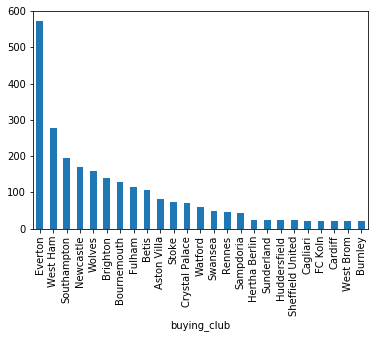

In [165]:
flops.groupby('buying_club').fee_in_millions_usd.sum().sort_values(ascending = False).plot(kind = 'bar')

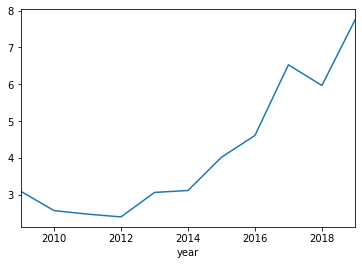

In [166]:
transfers.groupby('year').fee_in_millions_usd.mean().plot()

In [167]:
big_transfers = transfers[transfers.fee_in_millions_usd >= 50]
big_transfers = big_transfers.sort_values(by = 'fee_in_millions_usd', ascending = False)
big_transfers.head()

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
3279,2017,2017/2018,Paris SG,Neymar,25,Left Winger,Barcelona,£199.80m,263.736,French Ligue 1
10218,2017,2017/2018,Barcelona,Philippe Coutinho,25,Left Winger,Liverpool,£130.50m,172.260,Spanish La Liga
3455,2018,2018/2019,Paris SG,Kylian Mbappe,19,Striker,Monaco,£121.50m,160.380,French Ligue 1
10674,2019,2019/2020,Ath Madrid,Joao Felix,19,Striker,Benfica,£113.40m,149.688,Spanish La Liga
10219,2017,2017/2018,Barcelona,Ousmane Dembele,20,Left Winger,Dortmund,£112.50m,148.500,Spanish La Liga


In [168]:
transfers[(transfers.buying_club == 'Lyon') | (transfers.buying_club == 'Dortmund') | (transfers.buying_club == 'Monaco')].age.mean()

23.441176470588236

In [169]:
transfers.age.mean()

24.681692477876105

In [170]:
transfers[(transfers.buying_club == 'Lyon') | (transfers.selling_club == 'Lyon')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
100,2009,2009/2010,Portsmouth,Frederic Piquionne,30,Striker,Lyon,loan,0.594,English Premier League
127,2009,2009/2010,Sunderland,John Mensah,26,Center Back,Lyon,loan,1.782,English Premier League
253,2010,2010/2011,Aston Villa,Jean II Makoun,27,Defensive Midfielder,Lyon,£5.58m,7.366,English Premier League
260,2010,2010/2011,West Ham,Frederic Piquionne,31,Striker,Lyon,£1.08m,1.426,English Premier League
622,2012,2012/2013,Tottenham,Hugo Lloris,25,Goalkeeper,Lyon,£11.34m,14.969,English Premier League
821,2013,2013/2014,Southampton,Dejan Lovren,23,Center Back,Lyon,£9.00m,11.880,English Premier League
1060,2014,2014/2015,Swansea,Bafetimbi Gomis,28,Striker,Lyon,free_transfer,0.000,English Premier League
1122,2015,2015/2016,Tottenham,Clinton N'Jie,22,Striker,Lyon,£12.69m,16.751,English Premier League
1502,2017,2017/2018,Arsenal,Alexandre Lacazette,26,Striker,Lyon,£47.70m,62.964,English Premier League
1806,2019,2019/2020,Tottenham,Tanguy Ndombele,22,Center Midfielder,Lyon,£54.00m,71.280,English Premier League


In [171]:
matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2010-08-14,English Premier League,Aston Villa,West Ham,3,0,H,23.0,12.0,11.0,2.0,16.0,7.0,15.0,15.0,1.0,2.0,0.0,0.0
1,2010-08-14,English Premier League,Blackburn,Everton,1,0,H,7.0,17.0,2.0,12.0,1.0,3.0,19.0,14.0,2.0,1.0,0.0,0.0
2,2010-08-14,English Premier League,Bolton,Fulham,0,0,D,13.0,12.0,9.0,7.0,4.0,8.0,12.0,13.0,1.0,3.0,0.0,0.0
3,2010-08-14,English Premier League,Chelsea,West Brom,6,0,H,18.0,10.0,13.0,4.0,3.0,1.0,10.0,10.0,1.0,0.0,0.0,0.0
4,2010-08-14,English Premier League,Sunderland,Birmingham,2,2,D,6.0,13.0,2.0,7.0,3.0,6.0,13.0,10.0,3.0,3.0,1.0,0.0


In [172]:
transfers[(transfers.fee_in_millions_usd <= 20) & (transfers.fee_in_millions_usd > 0) & (transfers.buying_club.isin(top_4_finishes.team_name))]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1,2009,2009/2010,Man United,Mame Diouf,21,Striker,Molde FK,£4.05m,5.346,English Premier League
2,2009,2009/2010,Man United,Gabriel Obertan,20,Right Winger,Bordeaux,£3.60m,4.752,English Premier League
6,2009,2009/2010,Liverpool,Sotiris Kyrgiakos,30,Center Back,AEK Athens,£2.70m,3.564,English Premier League
9,2009,2009/2010,Chelsea,Daniel Sturridge,19,Striker,Man City,£6.53m,8.620,English Premier League
10,2009,2009/2010,Chelsea,Nemanja Matic,21,Defensive Midfielder,MFK Kosice,£1.58m,2.086,English Premier League
12,2009,2009/2010,Arsenal,Thomas Vermaelen,23,Center Back,Ajax,£10.80m,14.256,English Premier League
35,2009,2009/2010,Tottenham,Peter Crouch,28,Striker,Portsmouth,£9.45m,12.474,English Premier League
36,2009,2009/2010,Tottenham,Sebastien Bassong,23,Center Back,Newcastle,£8.37m,11.048,English Premier League
37,2009,2009/2010,Tottenham,Kyle Naughton,20,Right Back,Sheffield Utd.,£5.31m,7.009,English Premier League
38,2009,2009/2010,Tottenham,Younes Kaboul,23,Center Back,Portsmouth,£5.31m,7.009,English Premier League
